## Q6: Multilevel Thresholding 

Write python code from scratch for multilevel thresholding for image segmentation explained by author in research paper 4 and demonstrate results of each step.


In [1]:
#Importing Libraries

import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
import PIL 
from time import time 

# k1 and k2 are free parameters.
# Attached paper does not set recommended values for k1 and k2, 
# so took values which give good results
k1 = 0.075
k2 = 0.075

In [2]:
#Returns histogram of a raveled image
def get_histogram(img):

    hist = [0]*256
    for i in img:
            hist[i] += 1 
    return hist 

In [3]:
#Returns weighted mean and standard deviation of an interval in the histogram
def get_stats(hist, low, high):

    w_sum = 0

    for i in range(low, high + 1):
        w_sum += hist[i] * i

    w_mean = w_sum // np.sum(hist[low:high + 1])
    std = int(np.std(hist[low : high + 1]))

    return w_mean, std

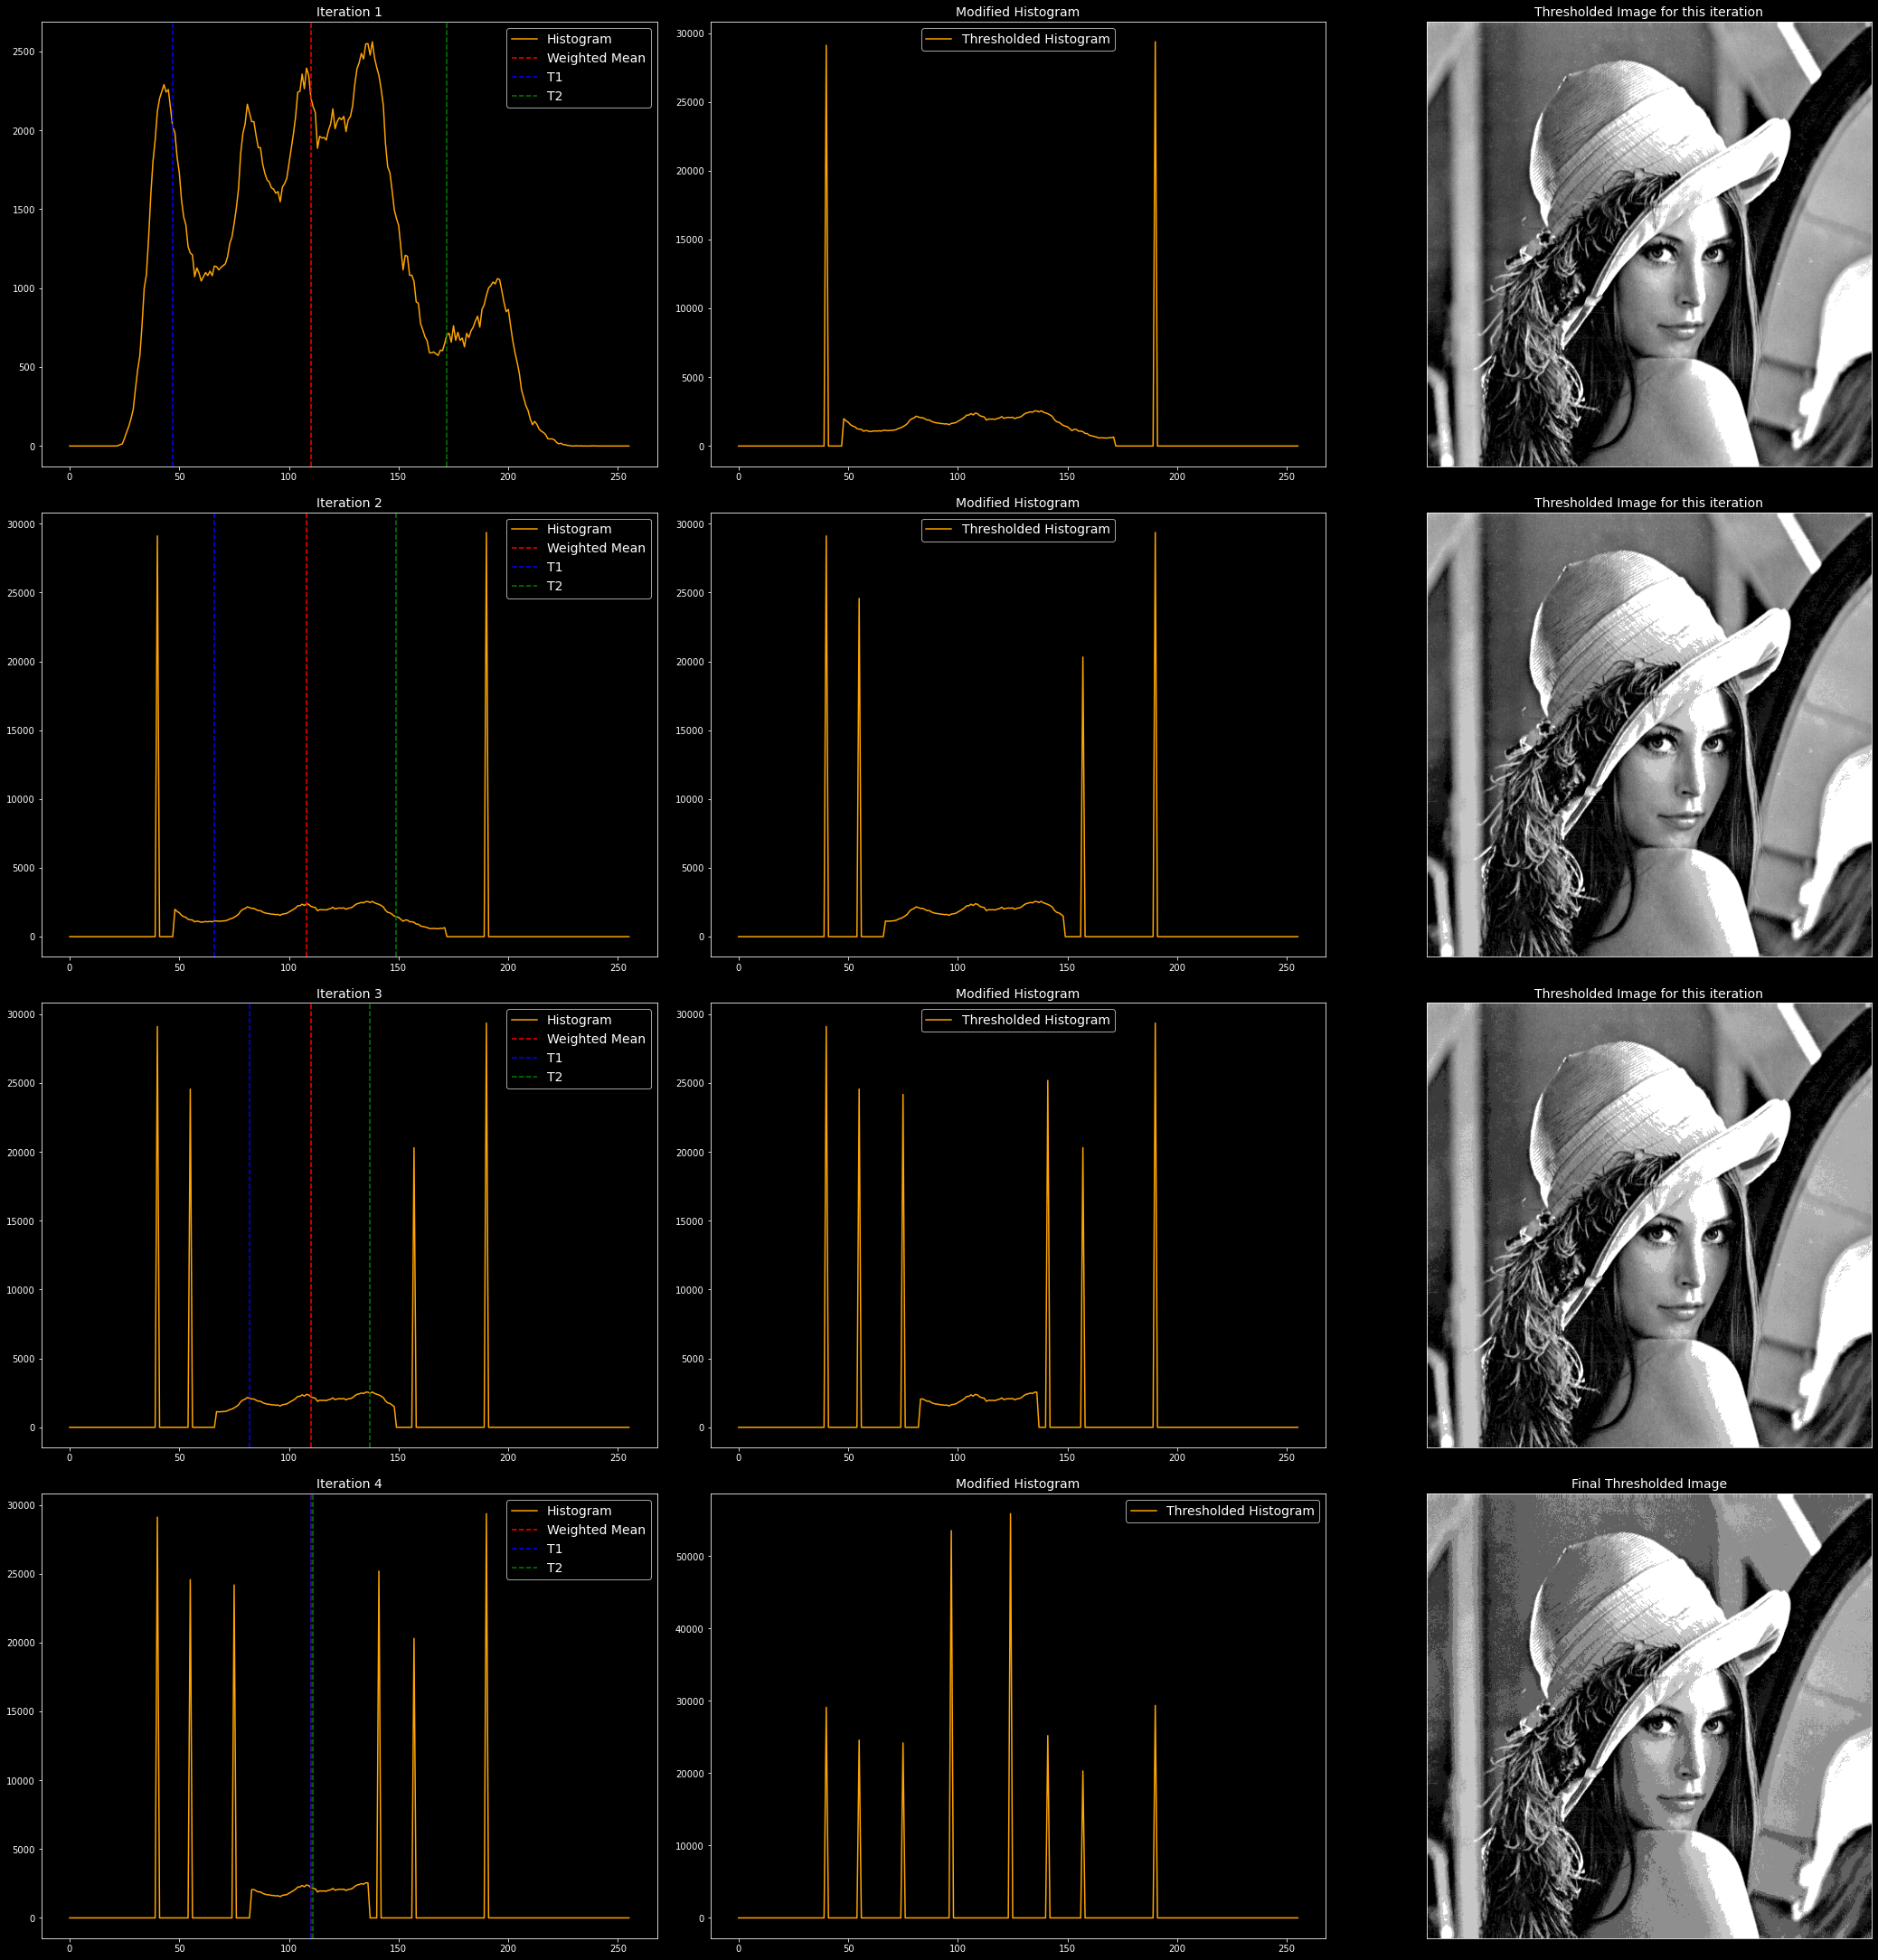

In [4]:
img = cv2.imread("lena.tif", 0)
orig_shape = img.shape 

THRESHOLDS = 8
raveled_img = np.ravel(img)

low = 0
high = 255
hist = get_histogram(raveled_img)
wmean, std = get_stats(hist, low, high)

plt.style.use('dark_background')
fig, ax = plt.subplots(THRESHOLDS//2, 3, figsize = (30, 30), constrained_layout = True)

for _ in range(THRESHOLDS//2 - 1):

    hist = get_histogram(raveled_img)
    wmean, std = get_stats(hist, low, high)

    T1 = int(wmean - k1*std)
    T2 = int(wmean + k2*std)

    ax[_][0].plot(hist, label = "Histogram", color = 'orange')
    ax[_][0].axvline(wmean, label = "Weighted Mean", linestyle = '--', color = 'red')
    ax[_][0].axvline(T1, label = "T1", linestyle = '--', color = 'blue')
    ax[_][0].axvline(T2, label = "T2", linestyle = '--', color = 'green')
    ax[_][0].set_title('Iteration {}'.format(_+1), fontsize = 14)
    ax[_][0].legend(fontsize = 14)
    
    meanT1, __ = get_stats(hist, low, T1)
    meanT2, __ = get_stats(hist, T2, high) 

    for i in range(len(raveled_img)):

        if raveled_img[i] >= low and raveled_img[i] <= T1:
            raveled_img[i] = meanT1

        elif raveled_img[i] >= T2 and raveled_img[i] <= high:
            raveled_img[i] = meanT2
    
    hist_ = get_histogram(raveled_img)
    thresh_img = raveled_img.reshape(orig_shape)
    
    ax[_][1].plot(hist_, label = "Thresholded Histogram", color = 'orange')
    ax[_][1].set_title("Modified Histogram", fontsize = 14)
    ax[_][1].legend(fontsize = 14)
    ax[_][2].imshow(thresh_img, cmap = 'gray')
    ax[_][2].set_title("Thresholded Image for this iteration", fontsize = 14)
    ax[_][2].set_xticks([])
    ax[_][2].set_yticks([])

    low = T1 + 1
    high = T2 - 1

hist = get_histogram(raveled_img)

T1 = int(wmean)
T2 = int(wmean+1)

ax[THRESHOLDS//2 - 1][0].plot(hist, label = "Histogram", color = 'orange')
ax[THRESHOLDS//2 - 1][0].axvline(wmean, label = "Weighted Mean", linestyle = '--', color = 'red')
ax[THRESHOLDS//2 - 1][0].axvline(T1, label = "T1", linestyle = '--', color = 'blue')
ax[THRESHOLDS//2 - 1][0].axvline(T2, label = "T2", linestyle = '--', color = 'green')
ax[THRESHOLDS//2 - 1][0].set_title('Iteration {}'.format(THRESHOLDS//2), fontsize = 14)
ax[THRESHOLDS//2 - 1][0].legend(fontsize = 14)

meanT1, __ = get_stats(hist, low, T1)
meanT2, __ = get_stats(hist, T2, high) 

for i in range(len(raveled_img)):

    if raveled_img[i] >= low and raveled_img[i] <= T1:
        raveled_img[i] = meanT1

    elif raveled_img[i] >= T2 and raveled_img[i] <= high:
        raveled_img[i] = meanT2 

hist_ = get_histogram(raveled_img)
thresh_img = raveled_img.reshape(orig_shape)

ax[THRESHOLDS//2 - 1][1].plot(hist_, label = "Thresholded Histogram", color = 'orange')
ax[THRESHOLDS//2 - 1][1].set_title("Modified Histogram", fontsize = 14)
ax[THRESHOLDS//2 - 1][1].legend(fontsize = 14)
ax[THRESHOLDS//2 - 1][2].imshow(thresh_img, cmap = 'gray')
ax[THRESHOLDS//2 - 1][2].set_title("Final Thresholded Image", fontsize = 14)
ax[THRESHOLDS//2 - 1][2].set_xticks([])
ax[THRESHOLDS//2 - 1][2].set_yticks([])

plt.show()



[]

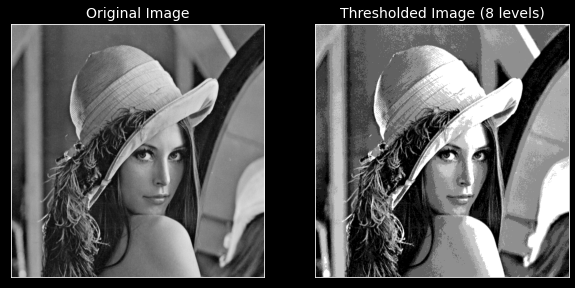

In [5]:
original = cv2.imread("lena.tif", 0)
thresh = np.reshape(raveled_img, orig_shape)

fig = plt.figure(figsize = (10, 10))

ax1 = fig.add_subplot(121)
ax1.imshow(original, cmap = 'gray')
ax1.set_title("Original Image", fontsize = 14)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(122)
ax2.imshow(thresh, cmap = 'gray')
ax2.set_title("Thresholded Image ({} levels)".format(THRESHOLDS), fontsize = 14)
ax2.set_xticks([])
ax2.set_yticks([])